### Background and Context

As the Data Scientist for a tourism company named "Visit with us". 
* The Policy Maker of the company wants to enable and establish a ***viable business model*** to expand the customer base.
* A viable business model is a central concept that helps you to ***understand the existing ways of doing the business*** and how to ***change the ways for the benefit of the tourism sector.***

* One of the ways to expand the customer base is to ***introduce a new offering of packages.***

Currently, there are ***5 types of packages*** the company is offering 
* Basic
* Standard
* Deluxe
* Super Deluxe
* King

Looking at the data of the last year, we observed that ***18%*** of the ***customers purchased the packages.***

* ***Marketing cost was quite high*** 
* customers were ***contacted at random*** without looking at the available information.

* The company is now planning to launch a new product called ***Wellness Tourism Package.***
* Wellness Tourism is defined as Travel that allows the traveler to: 
* Maintain, enhance  or kick-start a healthy lifestyle
* Support or increase one's sense of well-being.

However, this time company wants to: 
* Harness the available data of existing and potential customers to make the ***marketing expenditure more efficient***.

You as a Data Scientist at "Visit with us" travel company have to: 
* *Analyze* the customers' data and information
* ***Provide recommendations*** to the Policy Maker and Marketing Team 
* ***Build a model to predict the potential customer*** who is going to ***purchase the newly introduced travel package***.


#### Objective

***To predict which customer is more likely to purchase the newly introduced Wellness Tourism Package.***

#### Data Dictionary

#### Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Product taken flag  
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisited: Total number of person came with customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of the trip in a year by customer
* Passport: The customer has passport or not
* OwnCar: Customers owns a car flag
* NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 
* PitchSatisfactionScore: Sales pitch satisfactory score
* ProductPitched: Product pitched by a salesperson
* NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
* DurationOfPitch: Duration of the pitch by a salesman to customer

#### Best Practices for Notebook : 

* The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
* The notebook should be run from start to finish in a sequential manner before submission.
* It is preferable to remove all warnings and errors before submission.
* The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)


In [1]:
# install prerequisites packages 

# excel package
! pip install xlrd==1.2.0

# xgboost package
! pip install xgboost

# brew is a mac specific package manager
! brew install libomp 

Updating Homebrew...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> Updated Formulae
Updated 42 formulae.
==> Updated Casks
Updated 20 casks.

To reinstall 12.0.0, run:
  brew reinstall libomp


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
xls = pd.ExcelFile('Tourism.xlsx')

In [4]:
#show sheets in xls 
print(xls.sheet_names)

['Data Dict', 'Tourism']


In [186]:
# load tourism sheet into dataframe
tourism = pd.read_excel(xls, 'Tourism') 

In [187]:
#retain tourism dataframe as raw state dataframe
df=tourism.copy()

In [188]:
# Verify df first few rows
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [177]:
print(f'Tourism Dataset consist of {df.shape[0]} row(s) and {df.shape[1]} column(s).')

Tourism Dataset consist of 4888 row(s) and 19 column(s).


#### Verify number of unique values in each column

In [189]:
df.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

#### Verify Tourism Dataset Columns Datatype 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

* Observations:
 * Some columns (i.e.Age, TypeofContact, etc) have missing values and should be imputed with mean, mode, etc.
 * Some columns (i.e ProdTaken, CityTier, etc) should be converted to categorical type

### Convert columns to category type

In [10]:
cols = df.select_dtypes(['object'])
cols.columns

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [11]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [12]:
cols_to_convert = df[['ProdTaken','CityTier','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']]
cols_to_convert.columns

Index(['ProdTaken', 'CityTier', 'NumberOfPersonVisited', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisited'],
      dtype='object')

In [13]:
for i in cols_to_convert.columns:
    df[i] = df[i].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   category
 2   Age                      4662 non-null   float64 
 3   TypeofContact            4863 non-null   category
 4   CityTier                 4888 non-null   category
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   category
 9   NumberOfFollowups        4843 non-null   category
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   category
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   category
 14  Passport

In [15]:
# dataset summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.00,22347.0,25571.00,98678.0


In [16]:
df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
NumberOfPersonVisited,4888,5,3,2402
NumberOfFollowups,4843,6,4,2068
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862,3,3,2993
MaritalStatus,4888,4,Married,2340


* Observation:
 * ProdTaken is the target variable 
 * Customer ID ranges from 200000 to 204887. All Customer ID is unique
 * Age ranges from 18 to 61 years old 
 * Monthly income ranges from 1000 to 98678

In [17]:
# drop customer ID as in not needed for analysis and prediction 
df.drop(['CustomerID'],axis=1,inplace=True)

In [18]:
cols_cat= df.select_dtypes(['category'])

In [19]:
# Show columns unique values for all categories
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in NumberOfPersonVisited are :
3    2402
2    1418
4    1026
1      39
5       3
Name: NumberOfPersonVisited, dtype: int64
**************************************************
Un

# Perform an Exploratory Data Analysis on the data

### Univariate Analysis

In [20]:
# function for boxpolot histogram

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,  
                                           sharex = True,  
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="pastel") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # mean histogram  
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-')  # median histogram

####  Age:

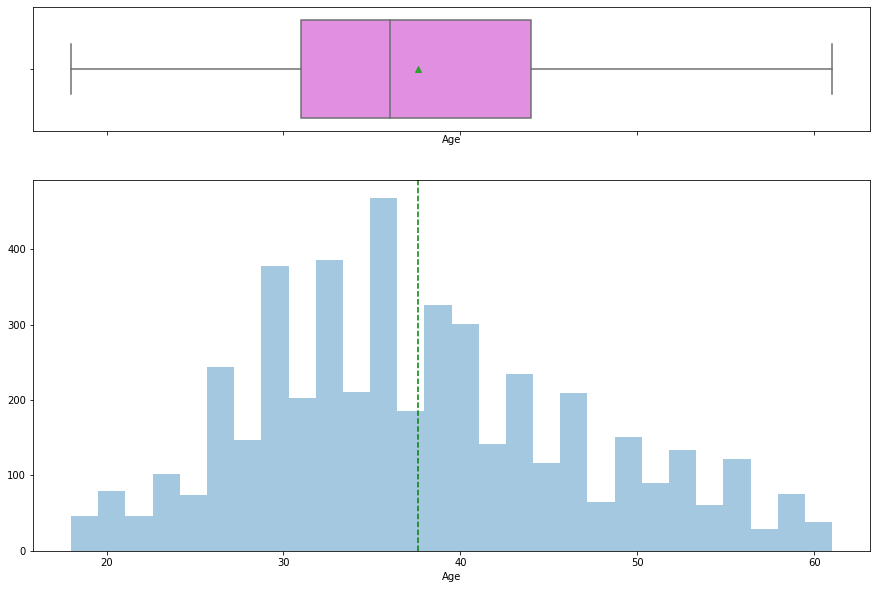

In [21]:
histogram_boxplot(df['Age'])

* Observations: 
 * Age distribution looks fairly even  

#### DurationOfPitch:

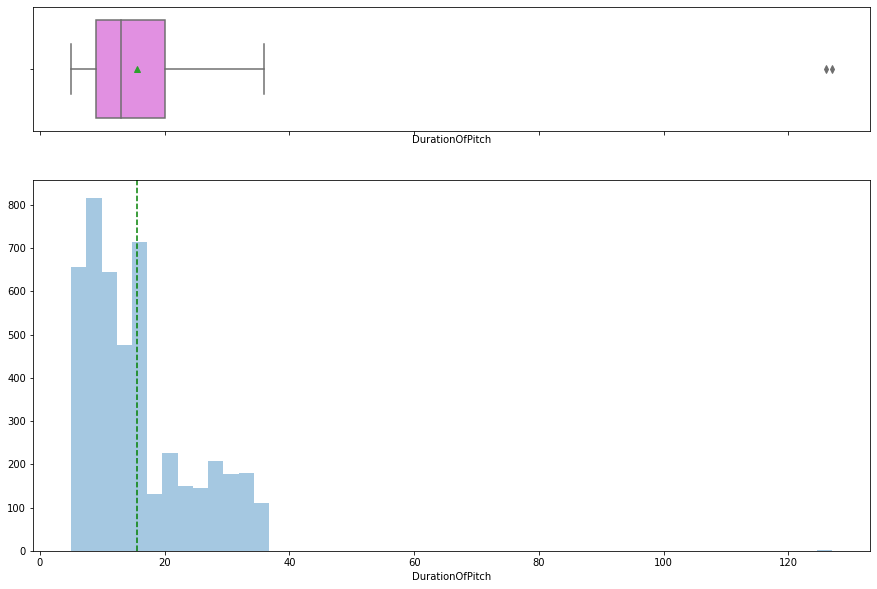

In [22]:
histogram_boxplot(df['DurationOfPitch'])

* Observations: 
 * DurationOfPitch distribution is left skewed

#### MonthlyIncome:

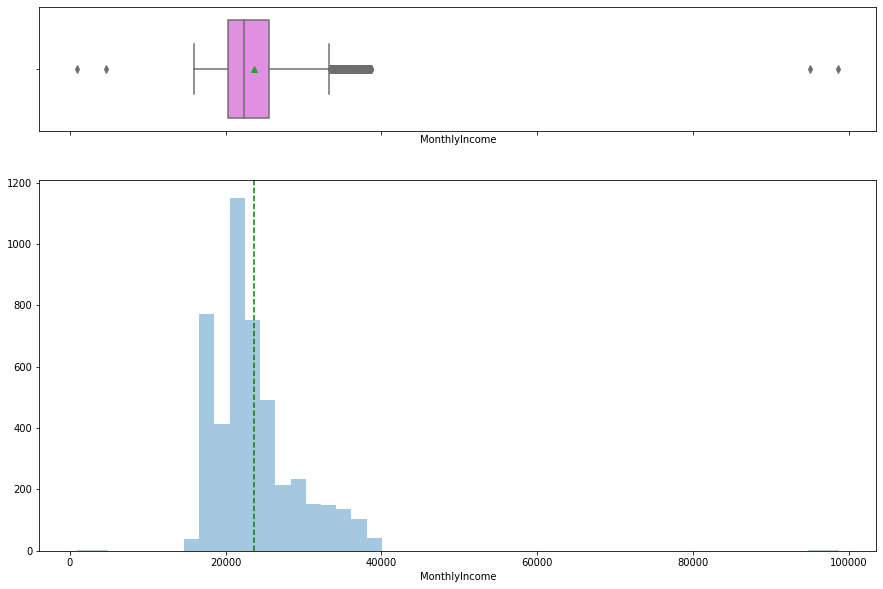

In [23]:
histogram_boxplot(df['MonthlyIncome'])

* Observations: 
 * Most MonthlyIncome is below 40000 ranges between 1000 (Min) to 98678 (Max). Distrbution is left skew ranges between 20000 to 25000. 

In [24]:
# function for boxplot histogram

def percentage_on_barplot(plot, feature):
    total = len(feature) # column length 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # each class category percentage 
        x = p.get_x() + p.get_width() / 2 - 0.05 # plot width  
        y = p.get_y() + p.get_height()           # plot height 
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show plot

In [25]:
# set common plot settings 
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")

<Figure size 1080x360 with 0 Axes>

#### ProdTaken :

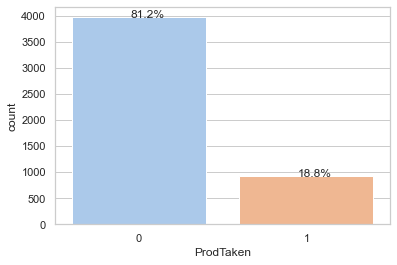

In [26]:
ax = sns.countplot(df["ProdTaken"],palette='pastel')
percentage_on_barplot(ax,df["ProdTaken"])

* Observations:
 *  Only 18.8% of customers have taken the holiday package 

#### TypeofContact:

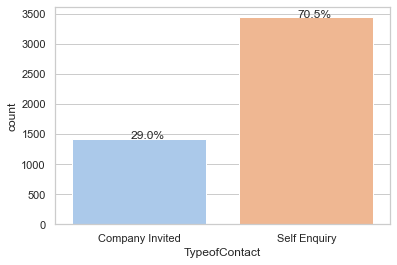

In [27]:
ax = sns.countplot(df["TypeofContact"],palette='pastel')
percentage_on_barplot(ax,df["TypeofContact"])

* Observations: 
 * 70.5% of the customers have done self enquiry rather than company invited

#### CityTier:

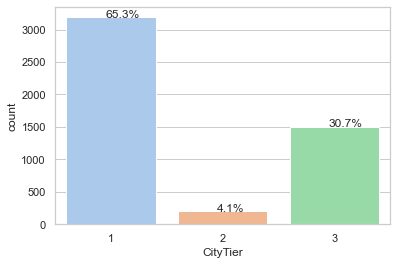

In [28]:
ax = sns.countplot(df["CityTier"],palette='pastel')
percentage_on_barplot(ax,df["CityTier"])

* Observations:
 * Most of customers are from city tier 1 followed by city tier 3  

#### Occupation:

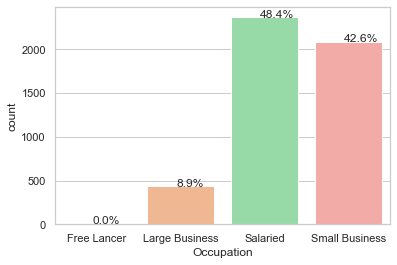

In [29]:
ax = sns.countplot(df["Occupation"],palette='pastel')
percentage_on_barplot(ax,df["Occupation"])

* Observations:
 *  42.6% are small business owners and about 9% are Large business owners.
 *  Free Lancer have a few outliers for 

#### Gender:

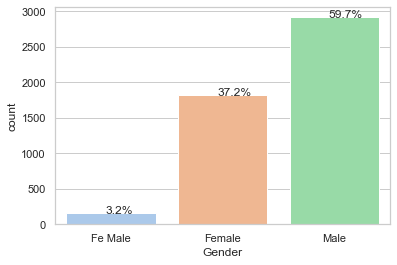

In [30]:
ax = sns.countplot(df["Gender"],palette='pastel')
percentage_on_barplot(ax,df["Gender"])

* Observations:
 * More than half of customer gender is male.     

#### NumberOfPersonVisited:

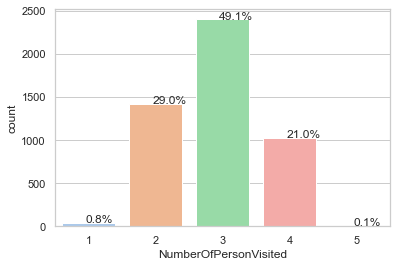

In [31]:
ax = sns.countplot(df["NumberOfPersonVisited"],palette='pastel')
percentage_on_barplot(ax,df["NumberOfPersonVisited"])

* Observations:
 * Most of the customers had 3 people come with them for visiting

#### PreferredPropertyStar:

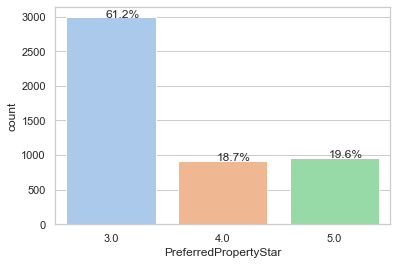

In [32]:
ax = sns.countplot(df["PreferredPropertyStar"],palette='pastel')
percentage_on_barplot(ax,df["PreferredPropertyStar"])

* Observations:
 * Most customers prefer a 3 star property

#### MaritalStatus:

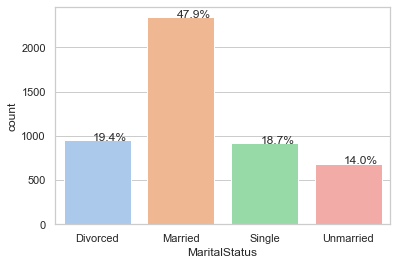

In [33]:
ax = sns.countplot(df["MaritalStatus"],palette='pastel')
percentage_on_barplot(ax,df["MaritalStatus"])

* Observations: 
 * Almost half of customers are married. 

#### NumberOfTrips:

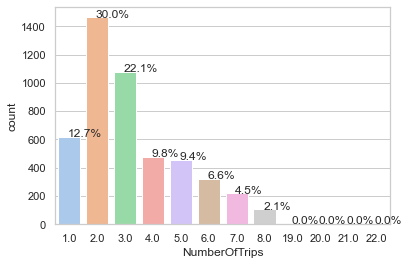

In [34]:
ax = sns.countplot(df["NumberOfTrips"],palette='pastel')
percentage_on_barplot(ax,df["NumberOfTrips"])

* Observations:  
 * Most customers takes 2 trips per year. 

#### Passport:

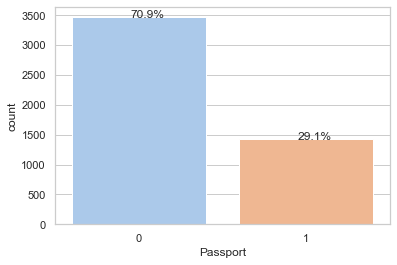

In [35]:
ax = sns.countplot(df["Passport"],palette='pastel')
percentage_on_barplot(ax,df["Passport"])

* Observations: 
 * Most customers do not have a passport.

#### OwnCar:

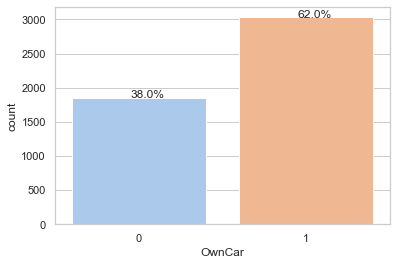

In [36]:
ax = sns.countplot(df["OwnCar"],palette='pastel')
percentage_on_barplot(ax,df["OwnCar"])

* Observations
 * Most customers owns a car 

#### NumberOfChildrenVisited:

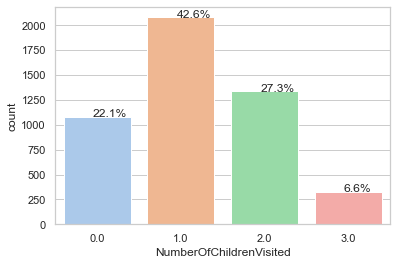

In [37]:
ax = sns.countplot(df["NumberOfChildrenVisited"],palette='pastel')
percentage_on_barplot(ax,df["NumberOfChildrenVisited"])

* Observations:  
 * Most customers have one child visit with them

#### Designation:

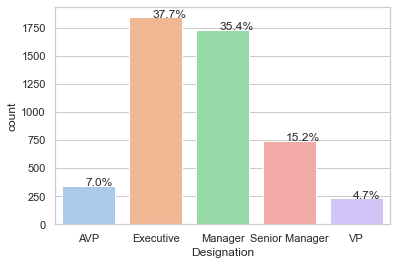

In [38]:
ax = sns.countplot(df["Designation"],palette='pastel')
percentage_on_barplot(ax,df["Designation"])

* Observations:
 * Majority of customers are Executives followed by Managers and Senior Managers 

#### PitchSatisfactionScore:

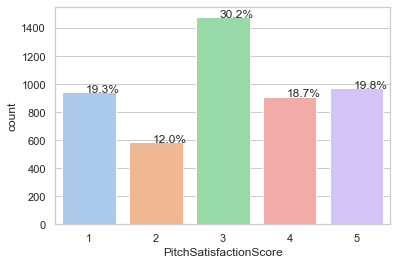

In [39]:
ax = sns.countplot(df["PitchSatisfactionScore"],palette='pastel')
percentage_on_barplot(ax,df["PitchSatisfactionScore"])

* Observations:
 * Most Pitch Satisfaction score is 3 

 #### ProductPitched:

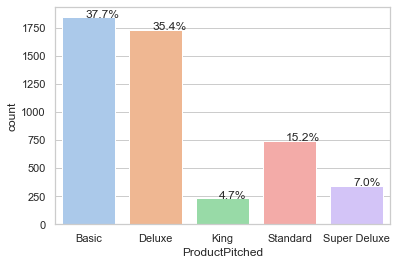

In [40]:
ax = sns.countplot(df["ProductPitched"],palette='pastel')
percentage_on_barplot(ax,df["ProductPitched"])

* Observations:
 * Basic has been the most pitched product followed by Super Deluxe

  #### NumberOfFollowups:

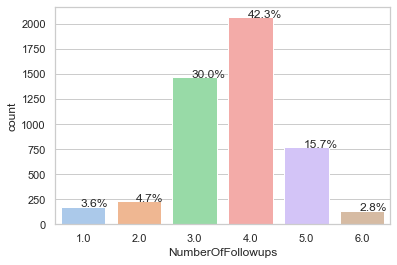

In [41]:
ax = sns.countplot(df["NumberOfFollowups"],palette='pastel')
percentage_on_barplot(ax,df["NumberOfFollowups"])

* Observations: 
 * Majority of followups is betwen 3 to 4 times.

### Bivariate Analysis

#### Heat Map:

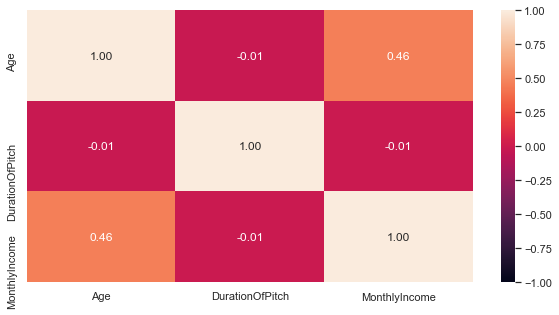

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f')
plt.show()

* Observations:
 * Correlation between age and monthly income is strong

#### Pairplot:

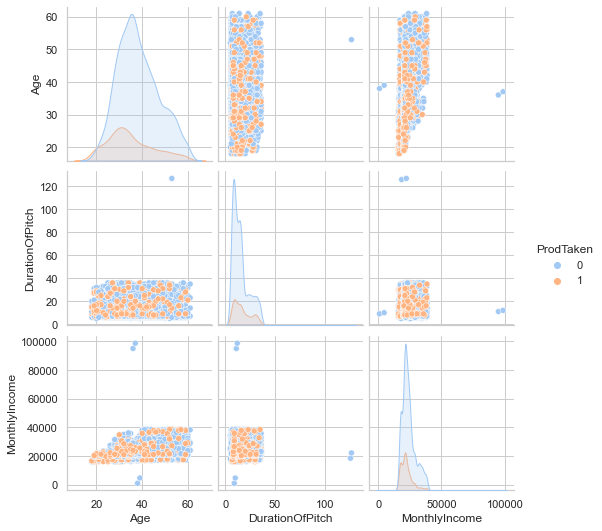

In [43]:
sns.pairplot(df,hue='ProdTaken', palette='pastel')
plt.show()

* Observation:
 * ProdTaken have varying distributions which constitute further investigation.

 ### Bivariate Analysis of ProdTaken with continuous variables

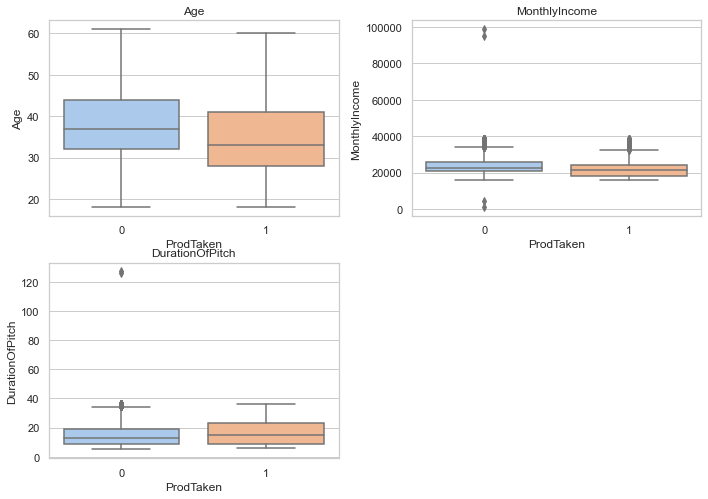

In [44]:
cols = df[['Age','MonthlyIncome','DurationOfPitch']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(df["ProdTaken"],df[variable],palette="pastel")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Observations: 
 * Holiday package customers age are mostly less than 40 years old
 * There's not much difference in te customers monthly income (who have and have not taken the package)
 * Package can be taken when there's higher duration of pitch by salesman to the customer

### Bivariate Analysis of ProdTaken with categorical variables

In [45]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='pastel')
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### TypeofContact:

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
------------------------------------------------------------------------------------------------------------------------


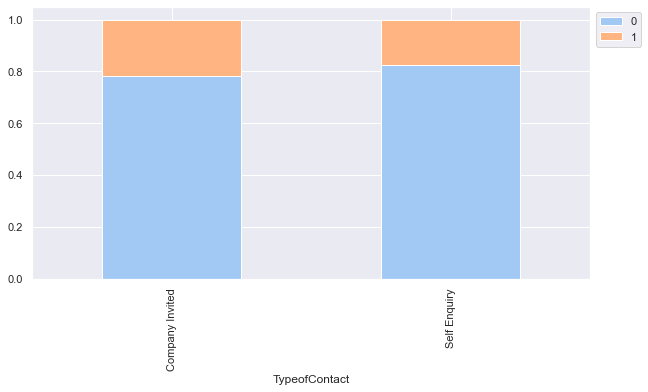

In [46]:
stacked_plot(df['TypeofContact'])

* Observations:
 * Customers who took the travel package was those who came into company's contact as company invited 

#### CityTier:

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


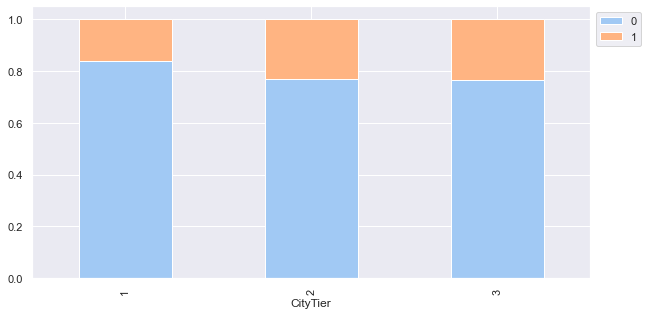

In [47]:
stacked_plot(df['CityTier'])

* Observations:
 * City tier 2 and 3 purchased the most travel package 

#### Occupation:

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


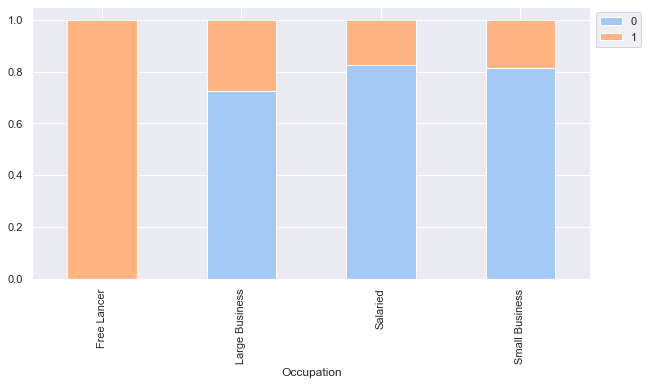

In [48]:
stacked_plot(df['Occupation'])

* Observations:
 * Customers who are Large Business and Free Lancers(though we have only 2 of them) have more tendency to purchase the product.

#### Gender:

ProdTaken     0    1   All
Gender                    
Fe Male     130   25   155
Female     1500  317  1817
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


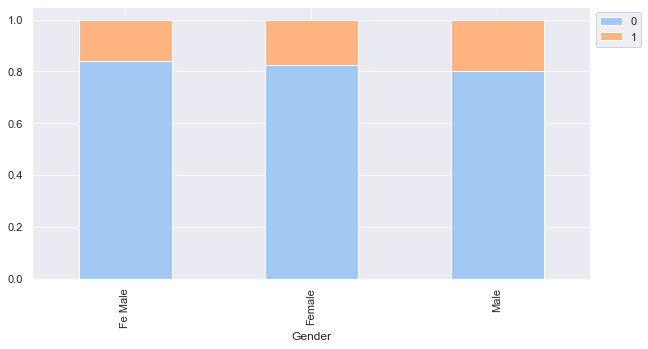

In [49]:
stacked_plot(df['Gender'])

* Observations:
 * Distinction between Fe Male, Female and Male customers who have purchased the travel package is negligible

#### NumberOfPersonVisited:

ProdTaken                 0    1   All
NumberOfPersonVisited                 
1                        39    0    39
2                      1151  267  1418
3                      1942  460  2402
4                       833  193  1026
5                         3    0     3
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


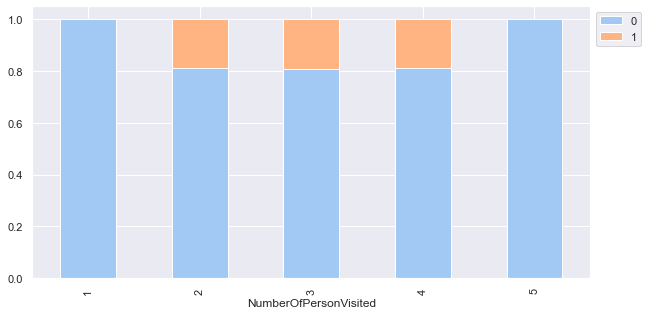

In [50]:
stacked_plot(df['NumberOfPersonVisited'])

* Observations:
 * 2,3,4 persons travelling with the customer has more chance of buying the travel package
 * 1 and 5 persons travelling with customer did not purchase any travel package

#### PreferredPropertyStar:

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2511  482  2993
4.0                     731  182   913
5.0                     706  250   956
All                    3948  914  4862
------------------------------------------------------------------------------------------------------------------------


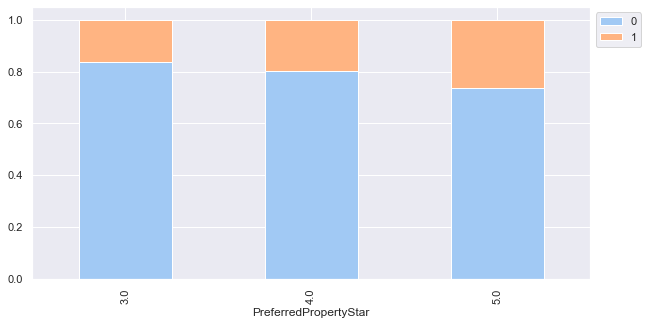

In [51]:
stacked_plot(df['PreferredPropertyStar'])

* Observations:
 * 5 star rated property customers bought the most travel packages

#### MaritalStatus:

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


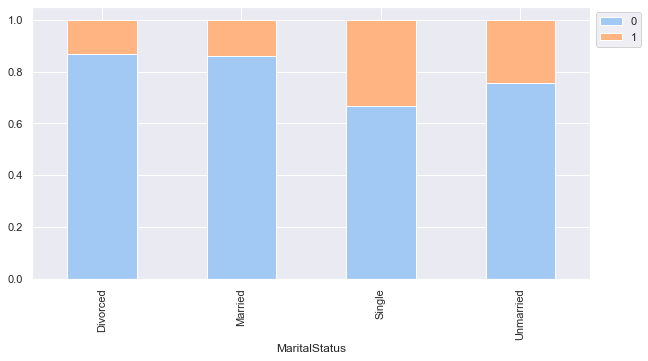

In [52]:
stacked_plot(df['MaritalStatus'])

* Observations:
 * Single and unmarried customer bought the most travel packages

#### NumberOfTrips:

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1165  299  1464
3.0             862  217  1079
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3840  908  4748
------------------------------------------------------------------------------------------------------------------------


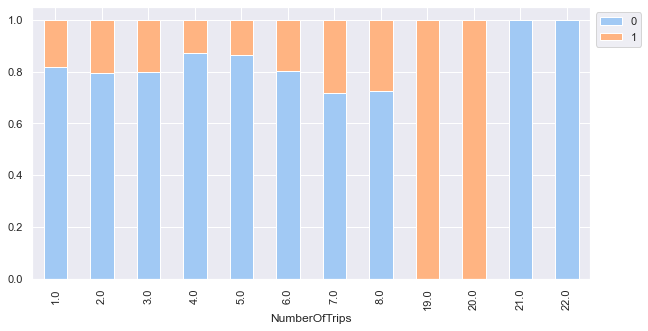

In [53]:
stacked_plot(df['NumberOfTrips'])

* Observations:
 * Customer who travel 7 or 8 trips per year has more possibilities of purchasing the travel package.

#### Passport:

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


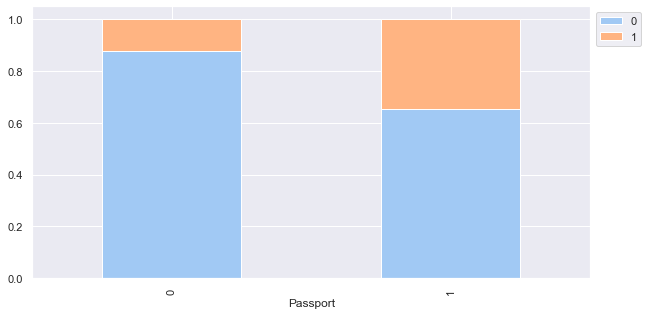

In [54]:
stacked_plot(df['Passport'])

* Observations:
 * Those who have a passport have higher chance of purchasing the travel package

#### OwnCar:

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


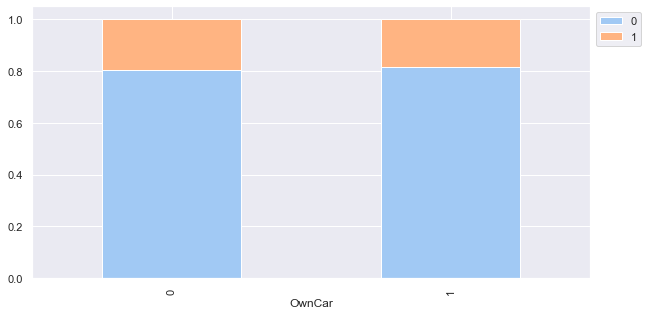

In [55]:
stacked_plot(df['OwnCar'])

* Observations:
 * Not much differences in correlations between owning a car or not influencing the possibilities of purchasing travel package 

#### NumberOfChildrenVisited:

ProdTaken                   0    1   All
NumberOfChildrenVisited                 
0.0                       880  202  1082
1.0                      1688  392  2080
2.0                      1082  253  1335
3.0                       259   66   325
All                      3909  913  4822
------------------------------------------------------------------------------------------------------------------------


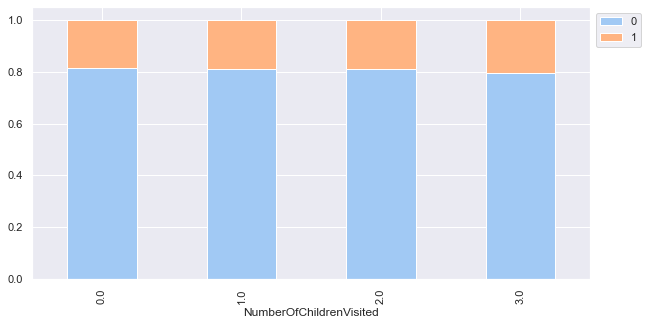

In [56]:
stacked_plot(df['NumberOfChildrenVisited'])

* Observations:
 * No difference in the purchasing travel package for customers from 0 to 3 children visiting with them 

#### Designation:

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


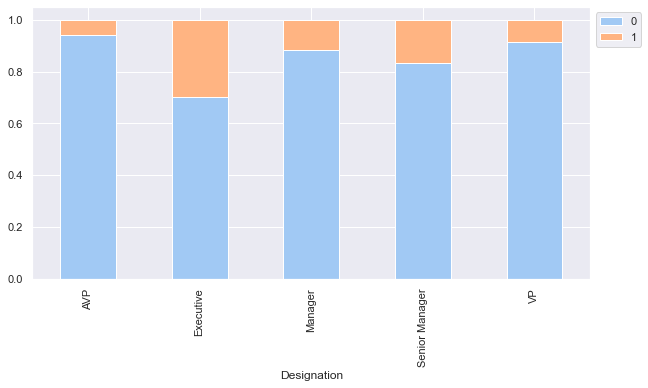

In [57]:
stacked_plot(df['Designation'])

* Observations:
 * Customer with executive position have purchased the travel package more followed by senior manager position

#### PitchSatisfactionScore:

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


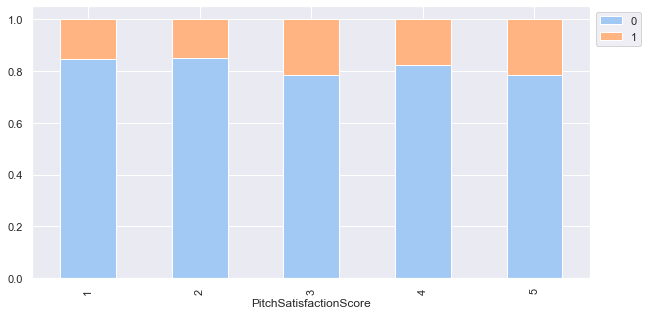

In [58]:
stacked_plot(df['PitchSatisfactionScore'])

* Observations:
 * Customers who have given a PitchSatisfactionScore of 3 or 5 have purchased the travel package more 

#### ProductPitched:

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


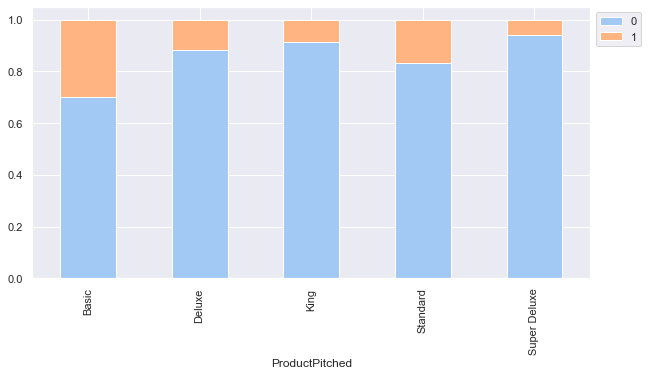

In [59]:
stacked_plot(df['ProductPitched'])

* Observations:
 * The package was purchased the most by customers when Basic product was pitched, followed by standard product 

#### NumberOfFollowups:

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1689  379  2068
5.0                 577  191   768
6.0                  82   54   136
All                3931  912  4843
------------------------------------------------------------------------------------------------------------------------


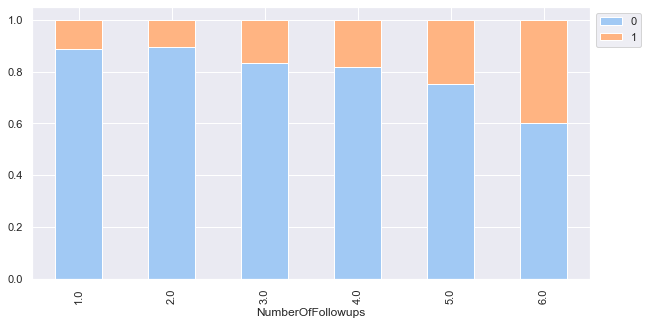

In [60]:
stacked_plot(df['NumberOfFollowups'])

* Observations:
 * High follow ups at 6 times showed good probability the customer will purchase the travel package

# Illustrate the insights based on EDA

* Most of holiday package has been taken by customers who are executives in less than 40 years of age
* Travel package customer preferred 5 star rated properties and mostly from city tier 2,3.
* Mostly who came into the company's contact through company invited
* FreeLancers and Large Business owners have higher possibility in purchasing the travel package
* Single and unmarried people have higher possibility in purchasing the travel package. 
* Customers with 2,3,4 persons travelling with them have more possibility in buying the travel package
* Customer who travel 7 or 8 trips per year has more possibility in purchasing the travel package.
* Customer who have a passport showed better possibility in purchasing the travel package
* Gender,number of children visiting, having a car do not have much effect on the travel package purchase Gender,number of children visiting, having a car.

Customer interaction data customers purchase the travel package when:

* There's is higher duration of pitch by salesman to the customer
* PitchSatisfactionScore are 3 or 5 
* Product pitched is mostly Basic followed by standard product
* High follow ups at 6 times showed good probability the customer will purchase the travel package

# Data Pre-processing

### Missing value Detection and Treatment

#### Verify for columns with missing values

In [61]:
df.shape

(4888, 19)

In [62]:
df.isnull().sum()

ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

* Observations:
 * Null values detected in columns: 
    * Age
    * TypeofContact
    * DurationOfPitch
    * NumberOfFollowups
    * PreferredPropertyStar
    * NumberOfTrips
    * NumberOfChildrenVisited
    * MonthlyIncome

### Impute Missing Values Records  with Median, Mode and etc. 

In [63]:
# show age will null values 
df[df["Age"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [64]:
# impute missing values with median Age of Males and Females using Designation
df.groupby(["Designation", "Gender"], as_index=False)["Age"].median()

,Designation,Gender,Age
0,AVP,Fe Male,40.0
1,AVP,Female,49.0
2,AVP,Male,49.0
3,Executive,Fe Male,32.0
4,Executive,Female,32.0
5,Executive,Male,32.0
6,Manager,Fe Male,36.0
7,Manager,Female,37.0
8,Manager,Male,36.0
9,Senior Manager,Fe Male,36.0


In [65]:
# impute missing age with median value
df["Age"] = df.groupby(["Designation", "Gender"])["Age"].transform(
    lambda x: x.fillna(x.median())
)

In [66]:
# verify for missing age values after imputing
df[df["Age"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [67]:
# verify TypeofContact with null values  
df[df['TypeofContact'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN
598,1,28.0,NaN,1,NaN,Small Business,Male,2,3.0,Basic,3.0,Single,7.0,0,3,0,0.0,Executive,NaN
622,0,32.0,NaN,3,NaN,Salaried,Male,3,3.0,Deluxe,3.0,Married,3.0,0,2,0,0.0,Manager,NaN
724,0,24.0,NaN,1,NaN,Small Business,Female,2,4.0,Deluxe,3.0,Married,2.0,0,3,1,1.0,Manager,NaN
843,0,26.0,NaN,1,NaN,Small Business,Male,2,1.0,Basic,3.0,Divorced,2.0,0,5,1,1.0,Executive,NaN
1021,1,25.0,NaN,3,NaN,Salaried,Male,3,4.0,Basic,5.0,Divorced,4.0,0,1,1,0.0,Executive,NaN


In [68]:
df['TypeofContact'].mode()

0    Self Enquiry
Name: TypeofContact, dtype: category
Categories (2, object): ['Company Invited', 'Self Enquiry']

In [69]:
# impute missing TypeofContact values with value Self Enquiry
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')

In [70]:
# verify if there's any missing TypeofContact values after imputing
df[df['TypeofContact'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [71]:
# verify DurationOfPitch with null values 
df[df['DurationOfPitch'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
46,0,34.0,Company Invited,3,NaN,Small Business,Male,3,3.0,Deluxe,3.0,Single,1.0,0,5,1,1.0,Manager,19568.0
75,0,31.0,Self Enquiry,1,NaN,Salaried,Female,3,3.0,Deluxe,3.0,Single,2.0,0,5,0,1.0,Manager,NaN
76,0,35.0,Self Enquiry,3,NaN,Small Business,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,1.0,Manager,NaN
84,0,34.0,Self Enquiry,1,NaN,Small Business,Male,3,3.0,Deluxe,4.0,Divorced,2.0,0,5,0,0.0,Manager,NaN
103,0,34.0,Self Enquiry,1,NaN,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,19809.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4215,0,19.0,Self Enquiry,3,NaN,Small Business,Female,4,5.0,Basic,3.0,Single,3.0,0,1,0,3.0,Executive,19878.0
4427,1,21.0,Self Enquiry,1,NaN,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,1,5,1,2.0,Executive,19687.0
4641,0,19.0,Company Invited,1,NaN,Salaried,Male,4,4.0,Basic,3.0,Single,3.0,0,1,0,2.0,Executive,19729.0
4678,0,29.0,Self Enquiry,3,NaN,Small Business,Male,4,4.0,Basic,4.0,Married,3.0,0,5,0,3.0,Executive,19730.0


In [72]:
# impute missing value for DurationOfPitch with the median value 
df['DurationOfPitch'].median()

13.0

In [73]:
# impute missing Duration of Pitch with median value
df['DurationOfPitch']=df['DurationOfPitch'].fillna(13)

In [74]:
#verify DurationOfPitch with null values after imputation
df[df['DurationOfPitch'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [75]:
# show NumberOfFollowups null values
df[df['NumberOfFollowups'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
79,0,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
94,0,32.0,Self Enquiry,3,12.0,Small Business,Male,2,NaN,Deluxe,3.0,Single,2.0,0,5,1,0.0,Manager,20010.0
96,0,24.0,Self Enquiry,3,9.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,1.0,0,4,1,0.0,Manager,19999.0
122,1,56.0,Self Enquiry,1,20.0,Salaried,Female,3,NaN,Basic,4.0,Divorced,1.0,1,5,1,1.0,Executive,19963.0
135,0,36.0,Self Enquiry,1,12.0,Small Business,Male,2,NaN,Deluxe,4.0,Married,7.0,0,4,1,1.0,Manager,19941.0
174,0,45.0,Self Enquiry,3,10.0,Salaried,Female,1,NaN,Deluxe,5.0,Married,5.0,1,4,0,0.0,Manager,20006.0
317,1,52.0,Self Enquiry,1,14.0,Small Business,Male,2,NaN,Deluxe,4.0,Divorced,3.0,0,2,1,1.0,Manager,19941.0
322,0,32.0,Self Enquiry,1,8.0,Small Business,Female,3,NaN,Deluxe,3.0,Single,1.0,0,3,1,2.0,Manager,20055.0
376,0,51.0,Self Enquiry,3,20.0,Salaried,Female,2,NaN,Deluxe,3.0,Divorced,5.0,0,3,0,1.0,Manager,19936.0
532,0,47.0,Self Enquiry,3,20.0,Small Business,Male,2,NaN,Deluxe,5.0,Single,3.0,0,2,0,1.0,Manager,19960.0


In [76]:
#impute the missing value for NumberOfFollowups using the mode value 
df['NumberOfFollowups'].mode()

0    4.0
Name: NumberOfFollowups, dtype: category
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [77]:
# Impute missing NumberOfFollowups with mode value
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(4)

In [78]:
# Verify NumberOfFollowups for null values after imputation
df[df['NumberOfFollowups'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [79]:
#Verify PreferredPropertyStar with null values 
df[df['PreferredPropertyStar'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2609,0,51.0,Self Enquiry,1,18.0,Salaried,Female,3,4.0,King,NaN,Single,5.0,0,5,1,1.0,VP,38604.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,NaN,Divorced,2.0,0,2,1,2.0,VP,38677.0
3012,1,56.0,Self Enquiry,1,9.0,Small Business,Male,4,4.0,King,NaN,Divorced,7.0,1,2,1,3.0,VP,38537.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,NaN,Married,3.0,0,4,1,1.0,VP,38651.0
3193,1,53.0,Self Enquiry,3,9.0,Small Business,Female,3,6.0,King,NaN,Divorced,3.0,0,3,1,1.0,VP,38523.0
3214,0,47.0,Self Enquiry,1,7.0,Small Business,Male,3,4.0,King,NaN,Married,2.0,0,5,1,2.0,VP,38305.0
3295,0,57.0,Self Enquiry,1,11.0,Large Business,Female,4,4.0,King,NaN,Married,6.0,0,4,0,3.0,VP,38621.0
3342,0,44.0,Self Enquiry,1,10.0,Salaried,Male,4,6.0,King,NaN,Divorced,5.0,0,5,1,3.0,VP,38418.0
3362,0,52.0,Company Invited,3,16.0,Salaried,Male,3,4.0,King,NaN,Married,6.0,1,4,1,2.0,VP,38525.0


In [80]:
# Impute missing value for PreferredPropertyStar with the mode value 
df['PreferredPropertyStar'].mode()

0    3.0
Name: PreferredPropertyStar, dtype: category
Categories (3, float64): [3.0, 4.0, 5.0]

In [81]:
# Impute missing PreferredPropertyStar with mode value
df['PreferredPropertyStar']=df['PreferredPropertyStar'].fillna(3)

In [82]:
#Check for null values after imputing
df[df['PreferredPropertyStar'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [83]:
#Show NumberOfTrips rows with null values
df[df['NumberOfTrips'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
2469,0,54.0,Self Enquiry,1,12.0,Salaried,Female,3,4.0,King,3.0,Married,NaN,0,5,0,2.0,VP,37772.0
2473,0,47.0,Self Enquiry,3,9.0,Small Business,Female,3,4.0,King,5.0,Single,NaN,0,2,0,2.0,VP,37625.0
2506,0,51.0,Self Enquiry,1,14.0,Small Business,Female,3,5.0,King,3.0,Married,NaN,1,4,1,2.0,VP,37418.0
2549,0,60.0,Company Invited,2,9.0,Salaried,Female,3,5.0,King,3.0,Divorced,NaN,0,2,1,2.0,VP,37522.0
2550,0,51.0,Company Invited,1,7.0,Salaried,Female,4,4.0,King,4.0,Divorced,NaN,1,2,0,3.0,VP,36850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,1,45.0,Self Enquiry,3,16.0,Salaried,Male,4,5.0,Basic,5.0,Married,NaN,0,1,1,3.0,Executive,37868.0
4850,1,46.0,Self Enquiry,3,8.0,Salaried,Male,4,5.0,Deluxe,5.0,Married,NaN,0,4,1,3.0,Manager,36739.0
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,NaN,1,1,1,1.0,Executive,35801.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,NaN,0,5,1,2.0,Executive,36539.0


In [84]:
# impute the missing value for NumberOfTrips with the mode value 
df['NumberOfTrips'].mode()

0    2.0
Name: NumberOfTrips, dtype: category
Categories (12, float64): [1.0, 2.0, 3.0, 4.0, ..., 19.0, 20.0, 21.0, 22.0]

In [85]:
# Impute missing NumberOfTrips with mode value
df['NumberOfTrips']=df['NumberOfTrips'].fillna(2)

In [86]:
#verify missing values after imputing
df[df['NumberOfTrips'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [87]:
# Verify NumberOfTrips rows with null values
df[df['NumberOfChildrenVisited'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
165,0,50.0,Self Enquiry,1,17.0,Salaried,Female,2,3.0,King,4.0,Single,4.0,0,5,1,NaN,VP,34926.0
190,0,52.0,Self Enquiry,1,6.0,Salaried,Male,3,4.0,King,3.0,Divorced,1.0,0,2,1,NaN,VP,34999.0
568,1,55.0,Self Enquiry,1,8.0,Small Business,Male,3,3.0,King,5.0,Divorced,6.0,1,2,1,NaN,VP,34859.0
746,0,41.0,Company Invited,1,13.0,Salaried,Female,2,5.0,King,3.0,Married,2.0,0,4,1,NaN,VP,34973.0
749,1,52.0,Self Enquiry,3,8.0,Small Business,Female,2,5.0,King,3.0,Divorced,2.0,0,3,1,NaN,VP,34845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,0,53.0,Self Enquiry,3,10.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Married,3.0,0,5,1,NaN,AVP,35534.0
4506,0,48.0,Self Enquiry,1,9.0,Salaried,Female,3,4.0,Super Deluxe,3.0,Married,3.0,1,4,1,NaN,AVP,35430.0
4530,0,52.0,Self Enquiry,3,33.0,Small Business,Female,4,4.0,Super Deluxe,3.0,Married,4.0,0,3,1,NaN,AVP,34985.0
4688,0,56.0,Company Invited,1,9.0,Small Business,Male,3,5.0,Super Deluxe,5.0,Single,2.0,0,3,1,NaN,AVP,35434.0


In [88]:
# Impute missing NumberOfChildrenVisited with 0
df['NumberOfChildrenVisited']=df['NumberOfChildrenVisited'].fillna(0)

From the data looks like mostly children visited is missing because no children accompanied these customers so we will fill the missing values with 0

In [89]:
# check for missing values after imputation 
df[df['NumberOfChildrenVisited'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [90]:
# show montly income rows wit null value
df[df['MonthlyIncome'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
11,0,37.0,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,32.0,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,37.0,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,32.0,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,37.0,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,1,34.0,Company Invited,3,13.0,Salaried,Female,2,5.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
2399,1,37.0,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,32.0,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2430,1,32.0,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [91]:
df.groupby(["Occupation"], as_index=False)["MonthlyIncome"].median()

,Occupation,MonthlyIncome
0,Free Lancer,18929.0
1,Large Business,21866.0
2,Salaried,22130.0
3,Small Business,22689.0


In [92]:
# Impute missing Monthly Income
df["MonthlyIncome"] = df.groupby(["Occupation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median())
)

In [93]:
df[df['MonthlyIncome'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [94]:
# verify dataframe columns for any null values after imputation 
df.isnull().sum()

ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

* Observation: 
 * There are no longer any null values after imputation 

### Outlier Detection

#### Detect outliers in numerical columns

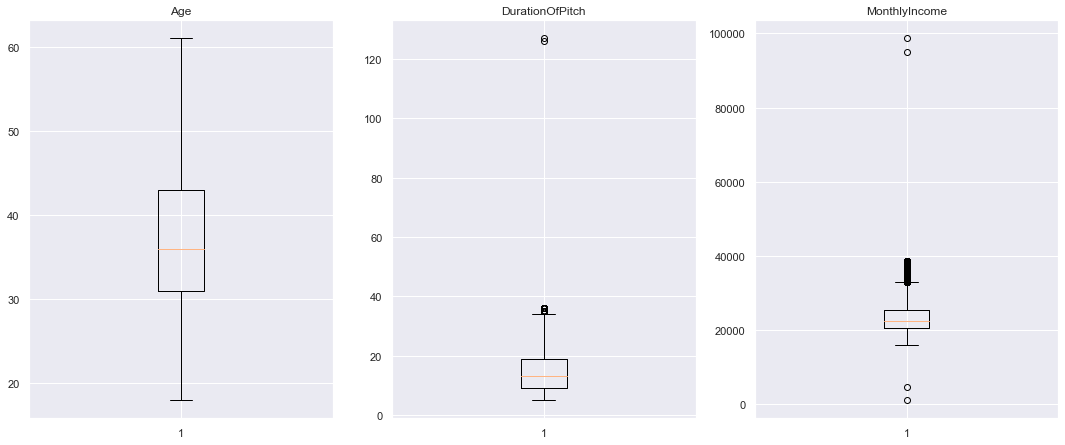

In [95]:
# detecting outlier with boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(['Age','DurationOfPitch','MonthlyIncome']):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [96]:
# Check DurationOfPitch extreme values
df.sort_values(by=["DurationOfPitch"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3718,0,32.0,Self Enquiry,3,36.0,Small Business,Female,4,5.0,Deluxe,3.0,Married,3.0,0,3,1,1.0,Manager,24146.0
3768,0,30.0,Self Enquiry,1,36.0,Salaried,Male,4,6.0,Deluxe,3.0,Married,2.0,0,5,1,3.0,Manager,25062.0
4738,0,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0


Durations may get extended due to various reasons hence we observe DurationOfPitch with 127, 126 values.

In [97]:
# Verify extreme values in MonthlyIncome
df.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Divorced,2.0,0,2,1,2.0,VP,38677.0
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Married,2.0,0,1,1,3.0,VP,38677.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,3.0,Married,3.0,0,4,1,1.0,VP,38651.0


* Observations:
 * More data is needed to determine if the few outliers are indeed true

In [98]:
# Verify extreme values in NumberOfTrips 
df.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
4596,0,33.0,Company Invited,1,7.0,Salaried,Female,4,5.0,Basic,4.0,Married,8.0,0,3,0,3.0,Executive,21010.0


* Observations:
 * More data is needed to determine if the few outliers are indeed true

# Model Building 
1. Prepare and Split data into train (70%) and test set (30%).
2. Build model based on train data.
3. Tune model as needed.
4. Test data with test set.

### Split Data set

* Due to significant imbalance in target classes distribution, stratified sampling will be applied to ensure relative class frequencies are approximately preserved in train and test sets. 
* Use `stratify` parameter in the train_test_split function.

Since our requirement is not to use customer interaction data for modelling ,we will drop those variables from our data for modelling

In [99]:
# Separating features and the target column
X = df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['ProdTaken']

In [100]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)

In [101]:
X_train.shape, X_test.shape

((3421, 39), (1467, 39))

In [102]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [103]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

### Model Evaluation Criterion

### Reduce model making wrong predictions:
1. Predict a customer purchasing a travel package but the customer ultimately does not purchase the package
2. Predict a customer will not purchase a travel package but the customer purchases the travel package

### Measure company objective:  
* The travel company objective is to `reduce marketing cost`, Predicting a customer wo will purchase travel package but the customer ultimately does not purchase the packaet is more important to the company to reduce the marketing cost and focus on customers who would actually buy the package

### Reduce Loss in False Positives?
* Company wants Precision to be maximized, greater the Precision higher the chances of minimizing false positives. Hence, the focus should be on increasing Precision or `minimizing the false positives` or in other words `identifying the true positives`,so that the company can focus on customers who will actually purchase the travel package and hence reduce marketing cost for the company

### Model Building (Decision Tree, Bagging classifier, Random Forest)

#### Defining function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix

In [104]:
##  Function to calculate precision score
def get_precision_score(model,flag=True):
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Precision on Training Set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on Test Set     : ",metrics.precision_score(y_test,pred_test))

    return b # return list with train and test scores

In [105]:
##  Function to calculate recall score
def get_recall_score(model,flag=True):
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Recall on Training Set    : ",metrics.recall_score(y_train,pred_train))
        print("Recall on Test Set        : ",metrics.recall_score(y_test,pred_test))
    
    return a # return list with train and test scores

In [106]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True):
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    if flag == True: # If the flag is set to True then only the following print statements will be dispayed
        print("Accuracy on Training Set  : ",model.score(X_train,y_train))
        print("Accuracy on Test Set      : ",model.score(X_test,y_test))
    
    return c # return list with train and test scores

In [107]:
## Function for confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

* In this case, we can pass a dictionary {0:0.19,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [108]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1)

In [109]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

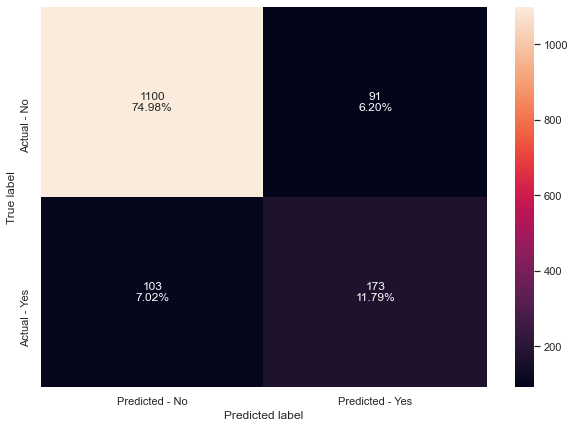

In [110]:
make_confusion_matrix(dtree,y_test)

In [111]:
dtree_acc = get_accuracy_score(dtree)
dtree_precision = get_precision_score(dtree)
dtree_recall = get_recall_score(dtree)

Accuracy on Training Set  :  1.0
Accuracy on Test Set      :  0.8677573278800272
Precision on Training Set :  1.0
Precision on Test Set     :  0.6553030303030303
Recall on Training Set    :  1.0
Recall on Test Set        :  0.6268115942028986


* Observation:
 * Decision tree is overfitting. 
 * Data accuracy and precision result is bad.

### Bagging Classifier

In [112]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

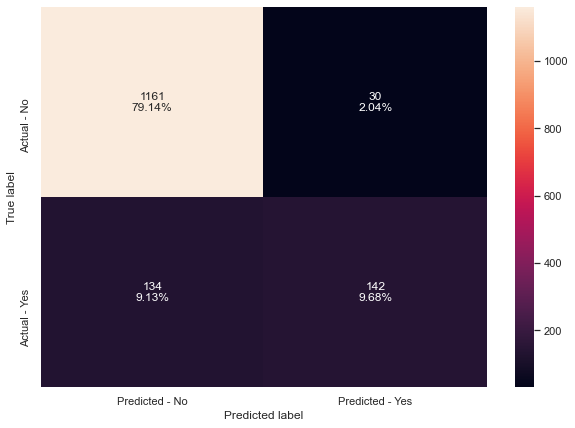

In [113]:
make_confusion_matrix(bagging,y_test)

In [114]:
bagging_acc = get_accuracy_score(bagging)
bagging_precision = get_precision_score(bagging)
bagging_recall = get_recall_score(bagging)

Accuracy on Training Set  :  0.9903536977491961
Accuracy on Test Set      :  0.8882072256305386
Precision on Training Set :  0.9951377633711507
Precision on Test Set     :  0.8255813953488372
Recall on Training Set    :  0.953416149068323
Recall on Test Set        :  0.5144927536231884


* Observations: 
 * Precision, Accuracy and Recall have all increased using bagging classifier

### Bagging Classifier with weighted decision tree

In [115]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.19,1:0.81},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  random_state=1)

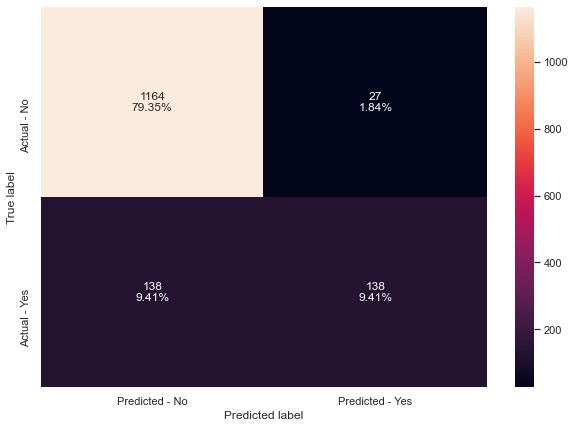

In [116]:
make_confusion_matrix(bagging_wt,y_test)

In [117]:
wt_bagging_acc = get_accuracy_score(bagging_wt)
wt_bagging_precision = get_precision_score(bagging_wt)
wt_bagging_recall = get_recall_score(bagging_wt)

Accuracy on Training Set  :  0.9894767611809413
Accuracy on Test Set      :  0.8875255623721882
Precision on Training Set :  0.9983606557377049
Precision on Test Set     :  0.8363636363636363
Recall on Training Set    :  0.9456521739130435
Recall on Test Set        :  0.5


* Observations: 
 * Precision has improved and Accuracy almost the same

### Random Forest

In [118]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

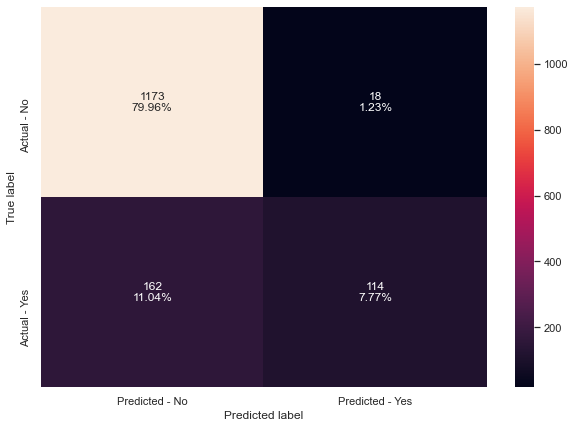

In [119]:
make_confusion_matrix(rf,y_test)

In [120]:
rf_acc = get_accuracy_score(rf)
rf_precision = get_precision_score(rf)
rf_recall = get_recall_score(rf)

Accuracy on Training Set  :  1.0
Accuracy on Test Set      :  0.8773006134969326
Precision on Training Set :  1.0
Precision on Test Set     :  0.8636363636363636
Recall on Training Set    :  1.0
Recall on Test Set        :  0.41304347826086957


* Observations:
 * Precision has improved but Recall has dropped 

### RandomForest With Class weigths

In [121]:
rf_wt = RandomForestClassifier(class_weight={0:0.19,1:0.81}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.19, 1: 0.81}, random_state=1)

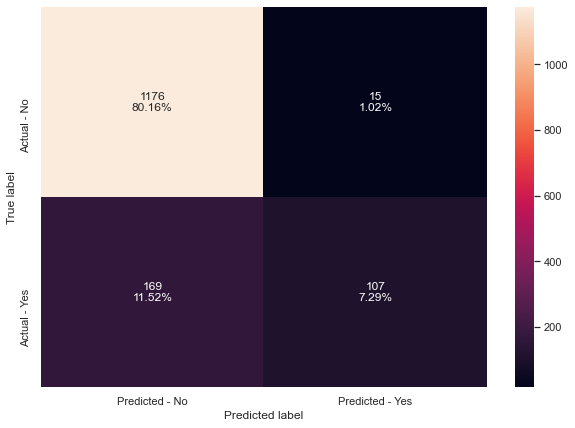

In [122]:
make_confusion_matrix(rf_wt,y_test)

In [123]:
wt_rf_acc = get_accuracy_score(rf_wt)
wt_rf_precision = get_precision_score(rf_wt)
wt_rf_recall = get_recall_score(rf_wt)

Accuracy on Training Set  :  1.0
Accuracy on Test Set      :  0.874573960463531
Precision on Training Set :  1.0
Precision on Test Set     :  0.8770491803278688
Recall on Training Set    :  1.0
Recall on Test Set        :  0.38768115942028986


* Observations: 
 * Precision improved slightly but overfitting exist

# Model performance improvement - Bagging

* Customer purchased package and model predicted customer will purchase travel package :  True Positive (observed=1,predicted=1)

* Customer did not purchase package and model predicted customer will purchase travel package  : False Postive (observed=0,predicted=1)

* Customer didnot purchase package and model predicted customer will not purchase travel package : True Negative (observed=0,predicted=0)

* Customer purchased package and model predicted customer will not purchase travel package  : False Negative (observed=1,predicted=0)

**Precision is the right metric for our case**.Company wants Precision to be maximized, greater the Precision higher the chances of minimizing false positives. Hence, the focus should be on increasing Precision or minimizing the false positives or in other words identifying the true positives,so that the company can focus on customers who will actually purchase the travel package and hence reduce marketing cost for the company

### Model Tuning using Grid Search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Tuning Decision Tree

In [124]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.precision_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.19, 1: 0.81}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

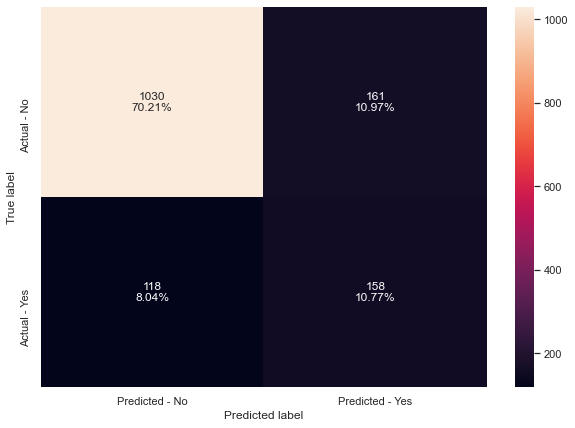

In [125]:
make_confusion_matrix(dtree_estimator,y_test)

In [126]:
tuned_dtree_acc = get_accuracy_score(dtree_estimator)
tuned_dtree_precision = get_precision_score(dtree_estimator)
tuned_dtree_recall = get_recall_score(dtree_estimator)

Accuracy on Training Set  :  0.7869044139140602
Accuracy on Test Set      :  0.8098159509202454
Precision on Training Set :  0.44785276073619634
Precision on Test Set     :  0.4952978056426332
Recall on Training Set    :  0.5667701863354038
Recall on Test Set        :  0.572463768115942


Recall has improved but Precision has decreased.Overfitting has also decreased

#### Tunning Bagging Classifier

In [127]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.19,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'precision', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.19,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='precision')

In [128]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=0.7, n_estimators=101, random_state=1)

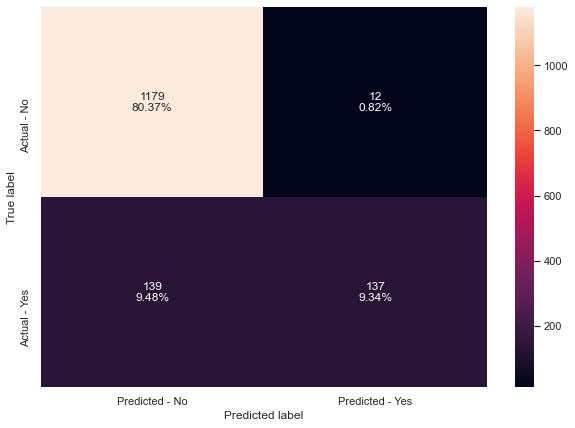

In [129]:
make_confusion_matrix(bagging_estimator,y_test)

In [130]:
tuned_bagging_acc= get_accuracy_score(bagging_estimator)
tuned_bagging_precision = get_precision_score(bagging_estimator)
tuned_bagging_recall = get_recall_score(bagging_estimator)

Accuracy on Training Set  :  1.0
Accuracy on Test Set      :  0.8970688479890934
Precision on Training Set :  1.0
Precision on Test Set     :  0.9194630872483222
Recall on Training Set    :  1.0
Recall on Test Set        :  0.4963768115942029


Precision has improved .Accuracy is also good.

#### Tuning Random Forest

In [131]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='precision',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, n_estimators=251,
                       random_state=1)

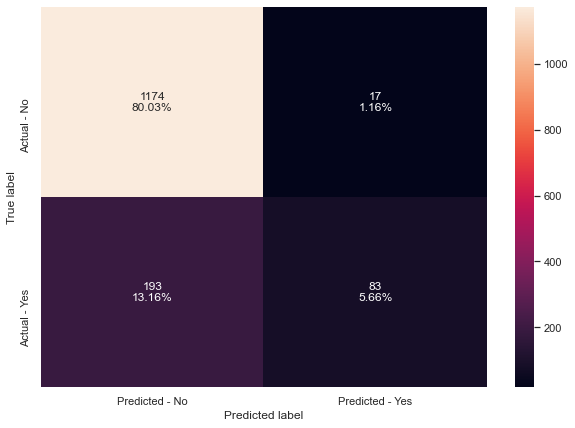

In [132]:
make_confusion_matrix(rf_estimator,y_test)

In [133]:
tuned_rf_acc = get_accuracy_score(rf_estimator)
tuned_rf_precision = get_precision_score(rf_estimator)
tuned_rf_recall = get_recall_score(rf_estimator)

Accuracy on Training Set  :  0.9988307512423268
Accuracy on Test Set      :  0.8568507157464212
Precision on Training Set :  1.0
Precision on Test Set     :  0.83
Recall on Training Set    :  0.9937888198757764
Recall on Test Set        :  0.3007246376811594


Tuning Random Forest seems to overfit the data

### Comparing all Models for Decision Tree, Bagging Classifier and Random Forest with (without Tuning)

In [134]:
# defining list of models
models = [dtree,bagging,bagging_wt,rf,rf_wt,dtree_estimator,bagging_estimator,rf_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])
    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [135]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Bagging Classifier','Bagging Classifier with weighted decision tree',
                                          'Random Forest','RandomForest With Class weigths','Tuned Decision Tree','Tuned Bagging Classifier','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test
                                          }) 

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,Decision Tree,1.000000,0.867757,1.000000,0.655303,1.000000,0.626812
1,Bagging Classifier,0.990354,0.888207,0.995138,0.825581,0.953416,0.514493
2,Bagging Classifier with weighted decision tree,0.989477,0.887526,0.998361,0.836364,0.945652,0.500000
3,Random Forest,1.000000,0.877301,1.000000,0.863636,1.000000,0.413043
4,RandomForest With Class weigths,1.000000,0.874574,1.000000,0.877049,1.000000,0.387681
5,Tuned Decision Tree,0.786904,0.809816,0.447853,0.495298,0.566770,0.572464
6,Tuned Bagging Classifier,1.000000,0.897069,1.000000,0.919463,1.000000,0.496377
7,Tuned Random Forest,0.998831,0.856851,1.000000,0.830000,0.993789,0.300725


Tuned Bagging classifier has the highest precision and good accuracy followed by Random Forest with class weights

### Feature Importance of Random Forest with class weights

In [136]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf_wt.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
MonthlyIncome                1.562000e-01
Age                          1.453877e-01
Passport_1                   7.826409e-02
Designation_Executive        3.994991e-02
CityTier_3                   3.843996e-02
PreferredPropertyStar_5.0    2.989639e-02
TypeofContact_Self Enquiry   2.953535e-02
MaritalStatus_Single         2.941518e-02
OwnCar_1                     2.912240e-02
PreferredPropertyStar_4.0    2.425241e-02
MaritalStatus_Married        2.409669e-02
NumberOfTrips_2.0            2.395059e-02
Designation_Manager          2.351332e-02
Occupation_Salaried          2.343055e-02
Occupation_Small Business    2.327863e-02
Gender_Male                  2.260717e-02
Gender_Female                2.227598e-02
NumberOfChildrenVisited_1.0  2.195132e-02
MaritalStatus_Unmarried      1.960028e-02
NumberOfTrips_3.0            1.907808e-02
NumberOfPersonVisited_3      1.809943e-02
NumberOfPersonVisited_2      1.706367e-02
NumberOfChildrenVisited_2.0  1.659

In [137]:
feature_names = X_train.columns

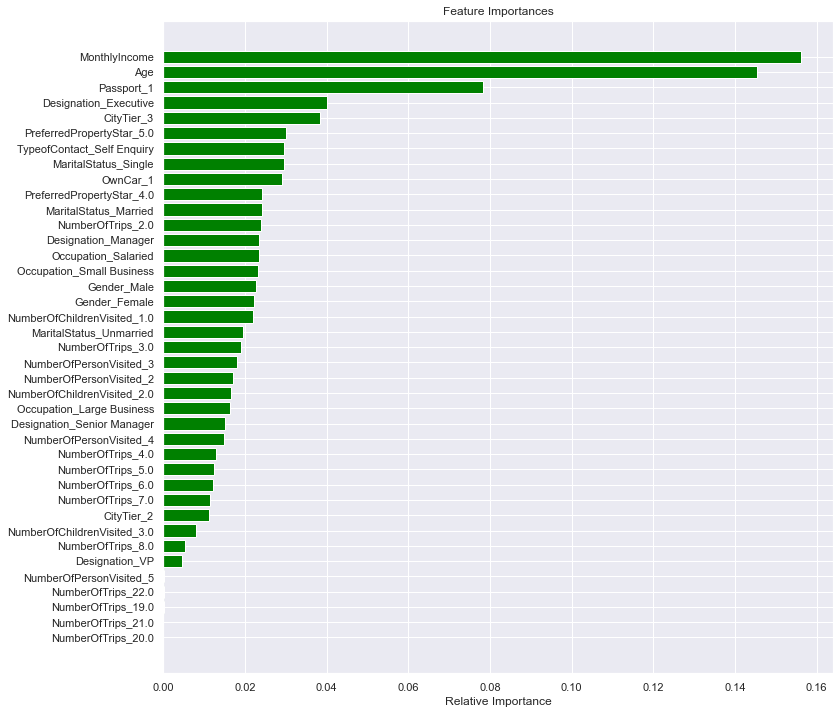

In [138]:
importances = rf_wt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Monthly Income,Age,having passport,Designation of Executive andcity_tier3 are top 5 features selected by Random Forest with class weights model

# Model Building - Boosting 

### Adaboost, Gradient Boost, XGBoost 

#### AdaBoost Classifier

In [139]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

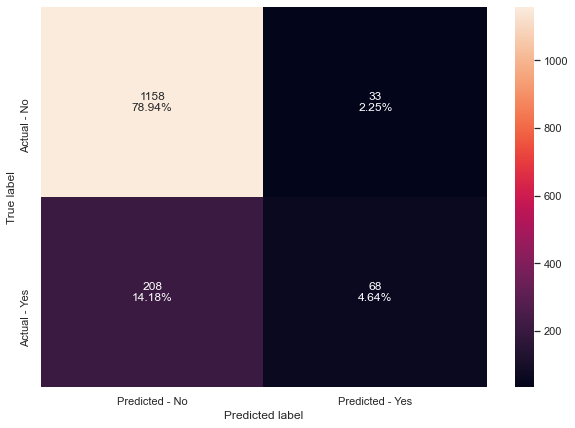

In [140]:
make_confusion_matrix(abc,y_test)

In [141]:
#Using above defined function to get accuracy,Recall and Precision on train and test set
abc_acc = get_accuracy_score(abc)
abc_precision = get_precision_score(abc)
abc_recall = get_recall_score(abc)

Accuracy on Training Set  :  0.844489915229465
Accuracy on Test Set      :  0.8357191547375596
Precision on Training Set :  0.7616822429906542
Precision on Test Set     :  0.6732673267326733
Recall on Training Set    :  0.2531055900621118
Recall on Test Set        :  0.2463768115942029


Accuracy and Precision seems to be good.Recall is not good

#### Gradient Boosting Classifier

In [142]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

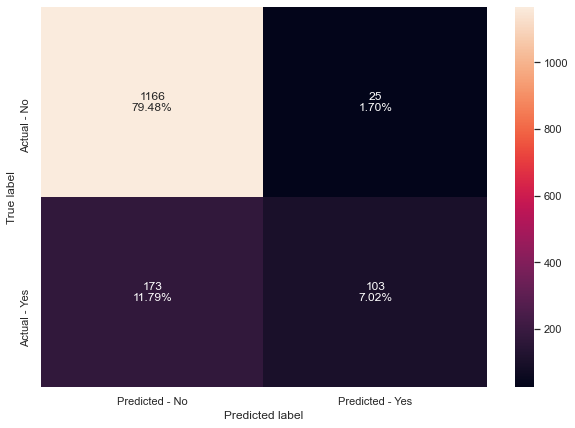

In [143]:
make_confusion_matrix(gbc,y_test)

In [144]:
#Using above defined function to get accuracy,precision and recall on train and test set
gbm_acc = get_accuracy_score(gbc)
gbm_precision = get_precision_score(gbc)
gbm_recall = get_recall_score(gbc)

Accuracy on Training Set  :  0.8798596901490792
Accuracy on Test Set      :  0.8650306748466258
Precision on Training Set :  0.8698412698412699
Precision on Test Set     :  0.8046875
Recall on Training Set    :  0.4254658385093168
Recall on Test Set        :  0.37318840579710144


Precision and recall looks better than Adaboost model

#### XGBoost Classifier

In [145]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

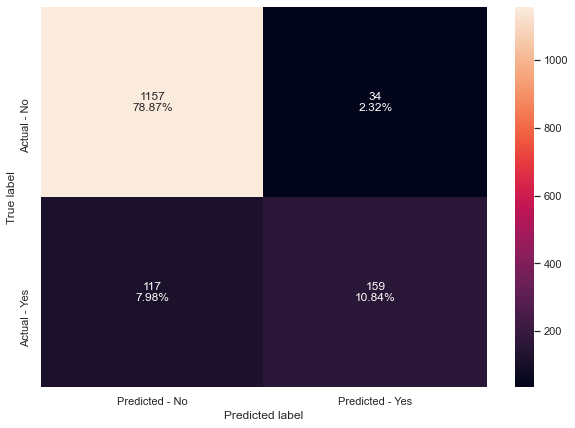

In [146]:
make_confusion_matrix(xgb,y_test)

In [147]:
#Using above defined function to get accuracy,precision and recall on train and test set
xgb_acc = get_accuracy_score(xgb)
xgb_precision = get_precision_score(xgb)
xgb_recall = get_recall_score(xgb)

Accuracy on Training Set  :  0.9964922537269805
Accuracy on Test Set      :  0.8970688479890934
Precision on Training Set :  1.0
Precision on Test Set     :  0.8238341968911918
Recall on Training Set    :  0.9813664596273292
Recall on Test Set        :  0.5760869565217391


XGboost seems to do well on the data but there is overfitting

# Model performance improvement - Boosting

* Customer purchased package and model predicted customer will purchase travel package :  `True Positive `  (observed=1,predicted=1)

* Customer did not purchase package and model predicted customer will purchase travel package  : `False Postive`  (observed=0,predicted=1)

* Customer did not purchase package and model predicted customer will not purchase travel package : `True Negative`  (observed=0,predicted=0)

* Customer urchased package and model predicted customer will not purchase travel package  : `False Negative`  (observed=1,predicted=0)

**Precision is the right metric for our case**.
* Company wants Precision maximized
* The greater the Precision higher the chances of minimizing false positives. 
* Focus is to `Increase Precision` or `Minimize false positives` or in other words identifying the true positives, so that the company can focus on customers who will actually purchase the travel package and hence reduce marketing cost for the company

### Hyperparameter Tuning

### Improve model performance further by tuning the Models

#### AdaBoost Classifier

In [148]:
# Define classifier type. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set clf to best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.9, n_estimators=100, random_state=1)

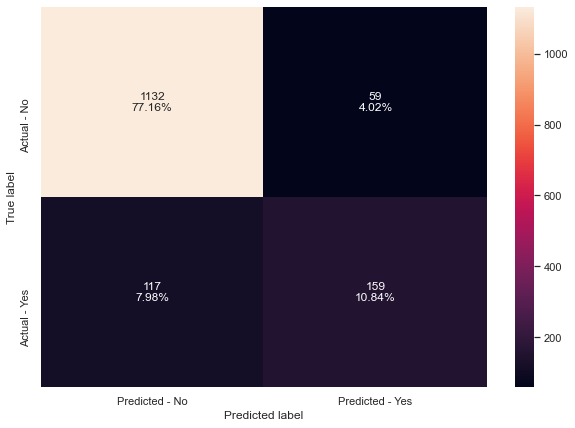

In [149]:
make_confusion_matrix(abc_tuned,y_test)

In [150]:
# Using above defined function to get accuracy, precision, recall on train and test set
tuned_abc_acc = get_accuracy_score(abc_tuned)
tuned_abc_precision = get_precision_score(abc_tuned)
tuned_abc_recall = get_recall_score(abc_tuned)

Accuracy on Training Set  :  0.9748611517100263
Accuracy on Test Set      :  0.880027266530334
Precision on Training Set :  0.9728813559322034
Precision on Test Set     :  0.7293577981651376
Recall on Training Set    :  0.8913043478260869
Recall on Test Set        :  0.5760869565217391


* Observations
 * There seems to be overfitting after AdaBoost Tuning

#### Gradient Boosting Classifier
#### Using AdaBoost classifier as the estimator for intial predictions

In [151]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

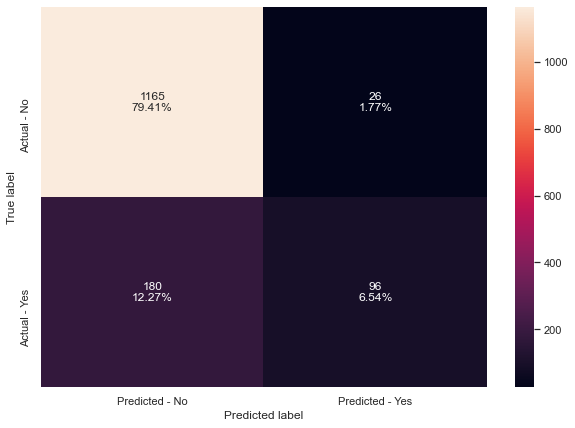

In [152]:
make_confusion_matrix(gbc_init,y_test)

In [153]:
# Using above defined function to get accuracy,precision,recall on train and test set
gbc_acc_init = get_accuracy_score(gbc_init)
gbc_acc_precision = get_precision_score(gbc_init)
gbc_acc_recall = get_recall_score(gbc_init)

Accuracy on Training Set  :  0.8798596901490792
Accuracy on Test Set      :  0.8595773687798227
Precision on Training Set :  0.8652037617554859
Precision on Test Set     :  0.7868852459016393
Recall on Training Set    :  0.42857142857142855
Recall on Test Set        :  0.34782608695652173


Gradient Boosting with Adaboost as base estimator is giving good predictions and there is no overfitting

#### Gradient Boosting Classifier

In [154]:
# Define classifier type. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=1)

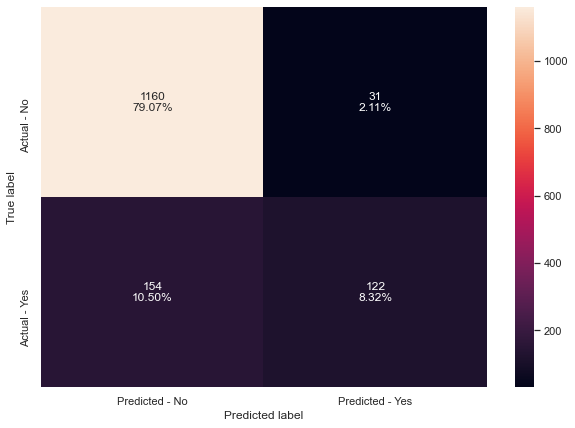

In [155]:
make_confusion_matrix(gbc_tuned,y_test)

In [156]:
# Use defined function to get accuracy on train and test set
tuned_gbc_acc = get_accuracy_score(gbc_tuned)
tuned_gbc_precision = get_precision_score(gbc_tuned)
tuned_gbc_recall = get_recall_score(gbc_tuned)

Accuracy on Training Set  :  0.9038292896813798
Accuracy on Test Set      :  0.8738922972051807
Precision on Training Set :  0.9155672823218998
Precision on Test Set     :  0.7973856209150327
Recall on Training Set    :  0.5388198757763976
Recall on Test Set        :  0.4420289855072464


Precision has increased with Tuning

#### XGBoost Classifier

In [157]:
# Define classifier type.
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [158]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

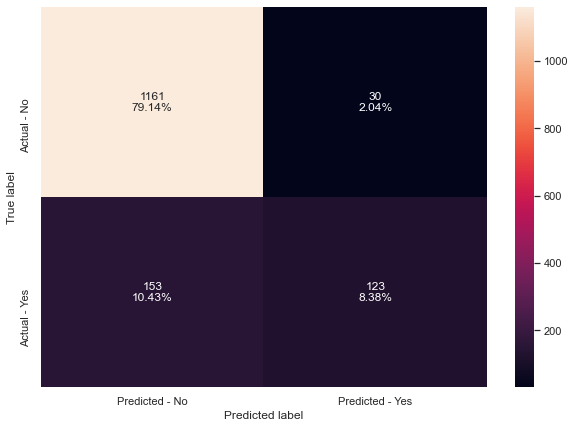

In [159]:
make_confusion_matrix(xgb_tuned,y_test)

In [160]:
#Use defined function to get accuracy, precision and recall on train and test set
tuned_xgb_acc = get_accuracy_score(xgb_tuned)
tuned_xgb_precision = get_precision_score(xgb_tuned)
tuned_xgb_recall = get_recall_score(xgb_tuned)

Accuracy on Training Set  :  0.9315989476761181
Accuracy on Test Set      :  0.8752556237218814
Precision on Training Set :  0.9701834862385321
Precision on Test Set     :  0.803921568627451
Recall on Training Set    :  0.656832298136646
Recall on Test Set        :  0.44565217391304346


There is overfitting on data as with original XBG Model

## Stacking Classifier

In [161]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [162]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[07:44:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.19,
                                                                     1: 0.81},
                                                       max_depth=3,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.7,
                                                       n_estimators=251,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostC

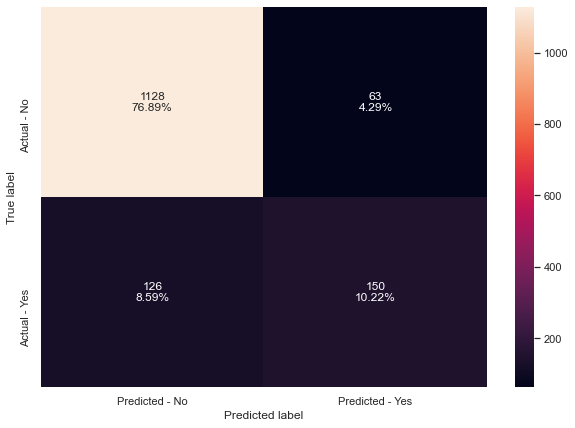

In [163]:
make_confusion_matrix(stacking_estimator,y_test)

In [164]:
stacked_acc = get_accuracy_score(stacking_estimator)
stacked_precision = get_precision_score(stacking_estimator)
stacked_recall = get_recall_score(stacking_estimator)

Accuracy on Training Set  :  0.997953814674072
Accuracy on Test Set      :  0.8711656441717791
Precision on Training Set :  0.995334370139969
Precision on Test Set     :  0.704225352112676
Recall on Training Set    :  0.9937888198757764
Recall on Test Set        :  0.5434782608695652


* Observations:
 * Stacking classifier is overfitting the data

# Model Performance Evaluation

### Comparing all Models

In [165]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_wt,bagging_estimator,rf,rf_wt,rf_estimator,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned,stacking_estimator]
# defining empty lists to add train and test results
acc_train = []
acc_test = []
pres_train =[]
pres_test =[]
recall_train =[]
recall_test =[]

# loop through all models to get accuracy, recall and precision scores
for model in models:
    # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    k = get_precision_score(model,False)
    pres_train.append(k[0])
    pres_test.append(k[1])
    l = get_recall_score(model,False)
    recall_train.append(l[0])
    recall_test.append(l[1])

In [166]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier','Bagging Classifier with weighted decision tree',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Random Forest with class weights','Tuned Random Forest','Adaboost Classifier',
                                          'Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Precision':pres_train,
                                          'Test_Precision':pres_test,
                                          'Train_Recall':recall_train,
                                          'Test_Recall':recall_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall
0,Decision Tree,1.000000,0.867757,1.000000,0.655303,1.000000,0.626812
1,Tuned Decision Tree,0.786904,0.809816,0.447853,0.495298,0.566770,0.572464
2,Bagging Classifier,0.990354,0.888207,0.995138,0.825581,0.953416,0.514493
3,Bagging Classifier with weighted decision tree,0.989477,0.887526,0.998361,0.836364,0.945652,0.500000
4,Tuned Bagging Classifier,1.000000,0.897069,1.000000,0.919463,1.000000,0.496377
5,Random Forest,1.000000,0.877301,1.000000,0.863636,1.000000,0.413043
6,Random Forest with class weights,1.000000,0.874574,1.000000,0.877049,1.000000,0.387681
7,Tuned Random Forest,0.998831,0.856851,1.000000,0.830000,0.993789,0.300725
8,Adaboost Classifier,0.844490,0.835719,0.761682,0.673267,0.253106,0.246377
9,Gradient Boosting Classifier,0.879860,0.865031,0.869841,0.804688,0.425466,0.373188


* Observations:
 * Tuned Bagging Classifier & Random Forest with class weight produce good performance
 * Tuned Gradient Boosting Classifier has comparable accuracy, precision and recall
 * Random Forest is also giving good performance

#### We explored feature importance of Random Forest in the earlier section.
Next is to analyze `Feature Importance` of `Tuned Gradient Boosting Classifier` and `Random Forest`

### Feature Importance of Tuned Gradient Boost Classifier

In [167]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.232104
Age                          0.156243
Passport_1                   0.141952
Designation_Executive        0.109080
CityTier_3                   0.057156
MaritalStatus_Single         0.053898
MaritalStatus_Unmarried      0.031230
PreferredPropertyStar_5.0    0.023522
CityTier_2                   0.020315
Designation_Manager          0.019041
NumberOfTrips_7.0            0.018023
Designation_Senior Manager   0.017376
Occupation_Large Business    0.014489
PreferredPropertyStar_4.0    0.010964
Gender_Female                0.010113
MaritalStatus_Married        0.009179
TypeofContact_Self Enquiry   0.009113
NumberOfTrips_6.0            0.008980
NumberOfTrips_8.0            0.008560
Gender_Male                  0.006628
NumberOfPersonVisited_2      0.005478
Occupation_Small Business    0.004894
OwnCar_1                     0.004808
NumberOfPersonVisited_4      0.004676
Occupation_Salaried          0.003515
NumberOfPers

In [168]:
feature_names = X_train.columns

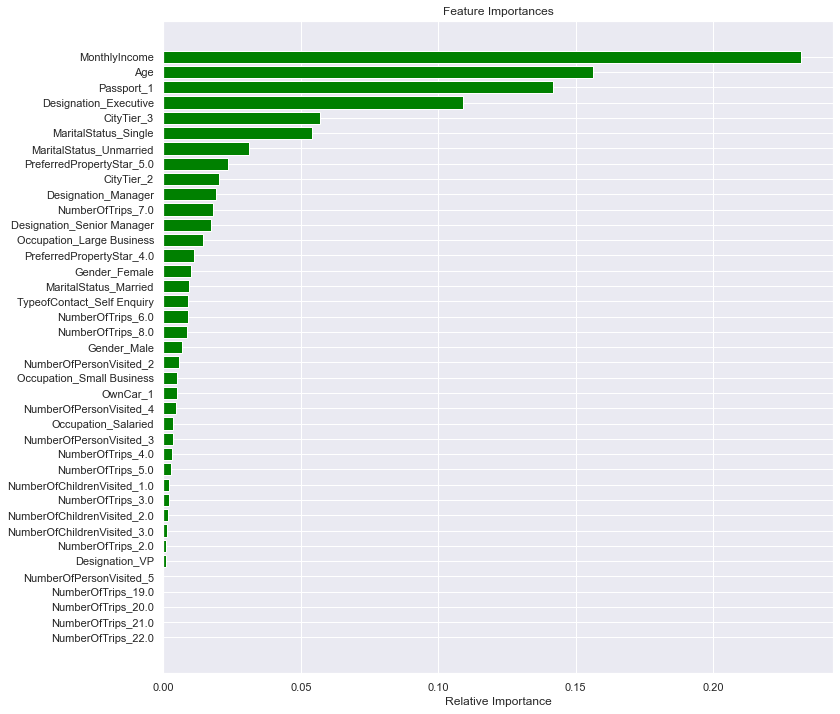

In [169]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Feature Importance of Random Forest

In [170]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
MonthlyIncome                1.637583e-01
Age                          1.506705e-01
Passport_1                   7.068504e-02
CityTier_3                   3.410768e-02
Designation_Executive        3.331353e-02
MaritalStatus_Single         3.235623e-02
TypeofContact_Self Enquiry   3.128800e-02
OwnCar_1                     2.944888e-02
PreferredPropertyStar_5.0    2.863952e-02
PreferredPropertyStar_4.0    2.520874e-02
NumberOfTrips_2.0            2.490996e-02
Gender_Male                  2.332257e-02
Occupation_Small Business    2.278398e-02
NumberOfChildrenVisited_1.0  2.276344e-02
Occupation_Salaried          2.257377e-02
Gender_Female                2.140358e-02
MaritalStatus_Married        2.084987e-02
MaritalStatus_Unmarried      2.020131e-02
NumberOfTrips_3.0            1.959936e-02
NumberOfPersonVisited_3      1.927640e-02
NumberOfChildrenVisited_2.0  1.837438e-02
Designation_Manager          1.817119e-02
NumberOfPersonVisited_2      1.735

In [171]:
feature_names = X_train.columns

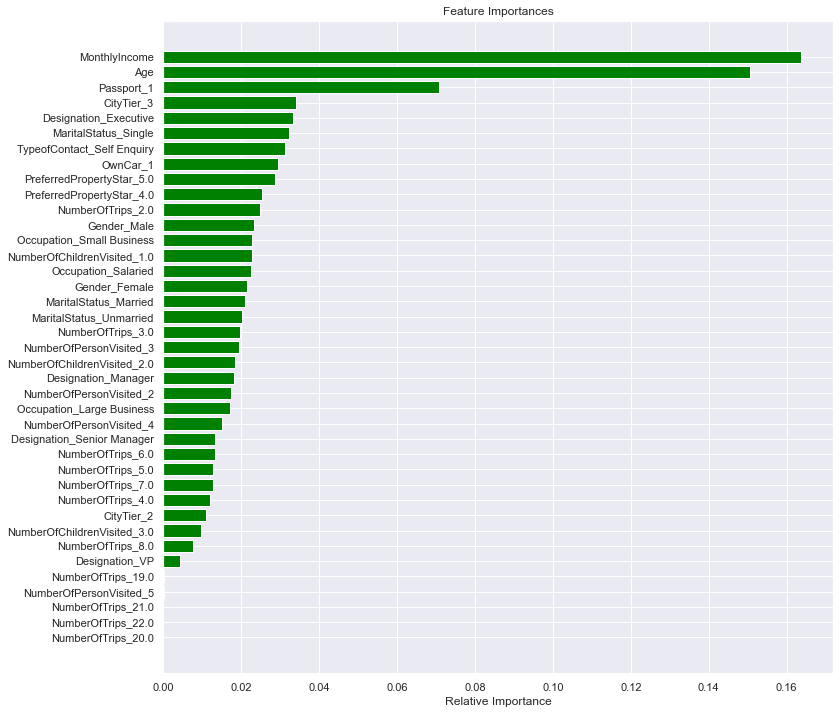

In [172]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Actionable Insights & Recommendations

* Factors based on model prediction listed below should be considered:
 * Company should target customers with `monthly income of up to 40,000` and `age below 40`
 * Those in `city tier 3` can be target for marketing as suggestions show they have higher chance of purchasing the travel package
 * Customers who are in `Manager designation` should also be targeted for Marketing
 * Customers who are `single` are show greater possibility in purchasing the package
 * Having a `passport` ,`own a car` and/or `own a business` are some of the factors which may lead customers into buying a travel package
 * Customers who prefer `5 star properties` should also be targeted to buy travel package


* Factors based on customer interaction data to boost the possiblity of the customer buying the travel package are:
 * `Higher duration of pitch` by salesman to the customer
 * `PitchSatisfactionScore` of `3 or 5`
 * `Multiple follow ups` with the customer. Having `6 follow ups` with the customer showed a good possibility the customer will purchase the travel package